---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 5

---

Please write your full name here
- **Name** : "Hanya Ahmad Samy"

# Clustering

In this assignment, you will be exploring kmeans algorithms for clustering

--------------------

The k-means clustering is first given the wanted number of clusters, say k, as a hyperparameter. Next, to start the algorithm, k points from the data set are chosen randomly as cluster centres. Then the following phases are repeated iteratively:

- any data point is set to belong to a cluster, whose centre is closest to it
- then for each cluster a new centre is chosen as the average of the data points in the cluster
This procedure is repeated until the clusters no longer change. This kind of algorithm is called an Expectation-Maximization (EM) algorithm, which is known to converge.

In [ ]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

# Question 0
Set random seed to 47

In [ ]:
import random
random.seed(47)


In [ ]:
random.random()

0.35184625582788265

# Question 1
Scatter plot the dataset

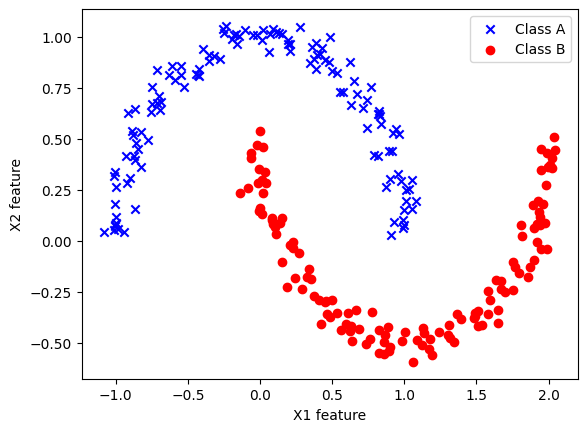

In [ ]:
classA=np.where(y==0)
classA=classA[0].tolist()
classB=np.where(y==1)
classB=classB[0].tolist()

classA_x=X[classA,:]
classB_x=X[classB,:]
classA_y=y[classA]
classB_y=y[classB]
plt.scatter(classA_x[:,0],classA_x[:,1], color='blue', marker='x', label='Class A')
plt.scatter(classB_x[:,0],classB_x[:,1], color='red', marker='o', label='Class B')
plt.xlabel('X1 feature')
plt.ylabel('X2 feature')
plt.legend()

plt.show()

# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

ANSWER:
K-Means is not expected to perform well on the make_moons dataset as it is a non-linearly separable dataset. K-Means algorithm works by minimizing the sum of squared distances between data points and their assigned cluster centroids. However, in the case of make_moons dataset, the data points are arranged in two half-moon shapes that overlap each other, making it difficult for K-Means to separate them into two distinct clusters.

Also, K-Means assumes that clusters are spherical and have equal variance, which is not true for the make_moons dataset. So, K-Means may fail to capture the structure of the data and produce accurate results.

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train SKlearn KMeans model using "k = 2".
4. Scatter plot the data after clustering with colors
5. **Comment on the results.**

ANSWER:

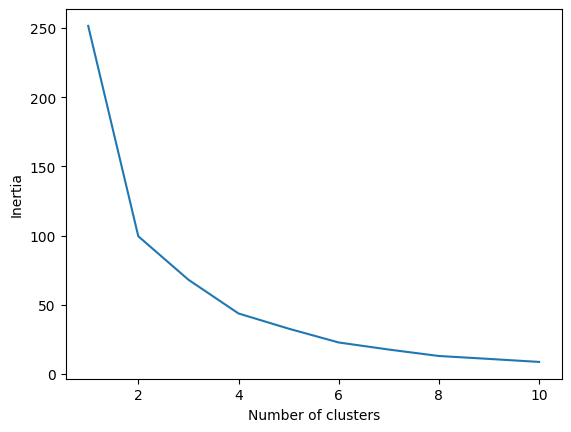

In [ ]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init = 10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

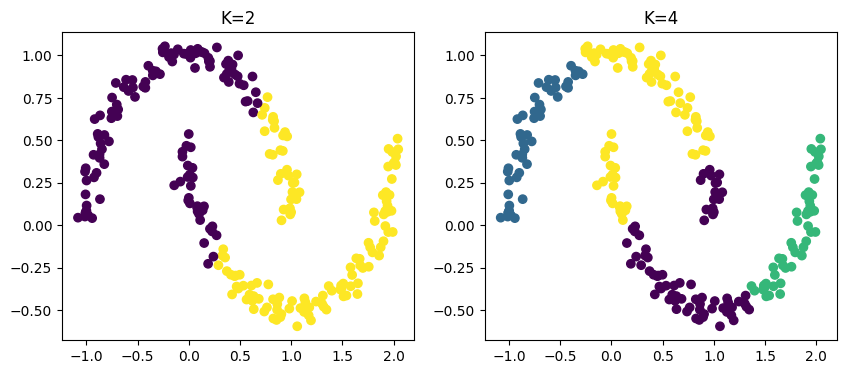

In [ ]:
clf = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42, n_init = 10)
clf.fit(X)
clf_optimal = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42, n_init = 10)
clf_optimal.fit(X)
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title("K=2")
plt.scatter(X[:,0], X[:,1], c=clf.labels_.astype(float))
plt.subplot(1,2,2)
plt.title("K=4")
plt.scatter(X[:,0], X[:,1], c=clf_optimal.labels_.astype(float))

plt.show()

# Comment:
The elbow plot showed two elbow points in the graph, one at k=2 and a lower one at k=4. The optimal k value is at the lowest elbow point, which is at k=4.
I have created two models one for k=2 and another for k=4 to visualize both cases using a scatter plot. It is evident from the plot that with k=2 the structure of the two moon-shaped classes is not captured at all and the data is misclassified, and that by setting k to 4 this misclassification is fixed to an extent.

- Try DBSCAN algorithm on the same data with eps = 0.3
- Scatter plot the resulting clusters

In [ ]:
dbscan_clf = DBSCAN(eps=0.3)
dbscan_clf.fit(X)


DBSCAN(eps=0.3)

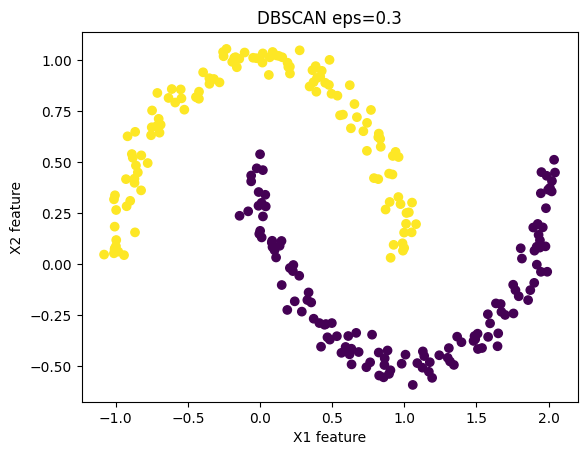

In [ ]:
plt.title("DBSCAN eps=0.3")
plt.scatter(X[:,0], X[:,1], c=dbscan_clf.labels_.astype(float))
plt.xlabel('X1 feature')
plt.ylabel('X2 feature')
plt.show()

**Compare between DBSCAN and kmeans results on the same data. Why do you think you got those results??**

ANSWER:

When applied to the make_moons dataset, DBSCAN was able to identify the two distinct clusters of data points accurately. On the other hand, k-means was not able to separate the two clusters as effectively as DBSCAN. This is because k-means assumes that clusters are spherical and have equal variance, which is not true for the make_moons dataset. DBSCAN was able to identify these two shapes as separate clusters because it does not assume any particular shape for the clusters. Instead, it identifies regions of high density and groups together points within those regions.


# Question 4
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm.
4. Comment on the following
    * Why do kmeans fail to cluster such data?

ANSWER:
Kmeans finds the centroid by minimizing the distance between data points of one cluster and their the calculated mean. In this case, the data of the bottom (purple) class has higher point density at the right, so its center is more shifted to the right, exactly at [-2.67884871  0.77010818]. On the other hand, the data of the top (yellow) class has higher point density at the left, so its center is more shifted to the left, exactly at [-3.28695619  3.08864448]. Therefore, the decision boundary is plotted vertically between the two centers and not diagonally as expected.

In [ ]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

In [ ]:
blob_clf = KMeans(n_clusters = 2, init = 'k-means++', random_state = random_state, n_init = 10)
blob_clf.fit(X_aniso)

KMeans(n_clusters=2, n_init=10, random_state=170)

[[-2.67884871  0.77010818]
 [-3.28695619  3.08864448]]


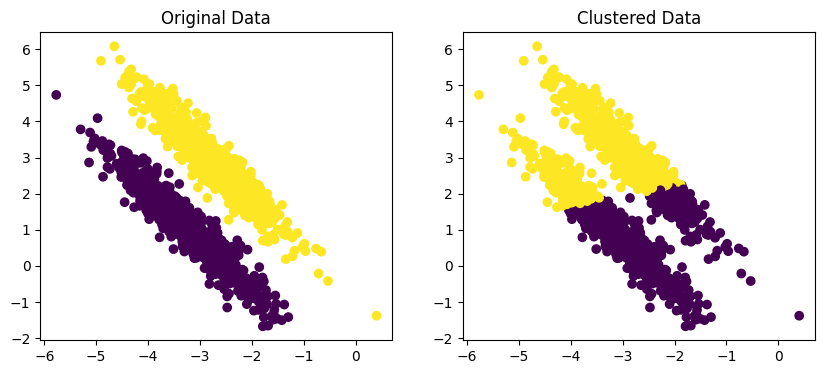

In [ ]:
print(blob_clf.cluster_centers_)
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title("Original Data")
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=y)
plt.subplot(1,2,2)
plt.title("Clustered Data")
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=blob_clf.labels_.astype(float))

plt.show()


# Question 5
Write your own K-means clustering from scratch, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [ ]:
def kmeans(k, data):
    centers = data[np.random.choice(data.shape[0], k, replace=False), :]
    while True:
        distances = np.sqrt(((data - centers[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        new_centers = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        # check if algorithm has converged
        if np.allclose(centers, new_centers):
            break

        centers = new_centers

    return centers.tolist()


# Question 6
For the following dataset:

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)
print(X_train[:10],y_train[:10])

[[-0.71159155  8.08486499]
 [ 1.61017527  1.37116697]
 [-0.29308348  7.35284559]
 [ 1.19746266  1.48871774]
 [ 3.56953269  1.83323322]
 [ 1.02283213  4.51551766]
 [ 1.83747356  5.14545322]
 [-0.70697869  7.00674357]
 [-1.22121439  6.67575944]
 [ 1.51632627  1.27513809]] [3 1 3 1 1 0 0 3 3 1]


- Scatter plot the data **without** coloring the points using labels.
- How many clusters do you see?

ANSWER:
4


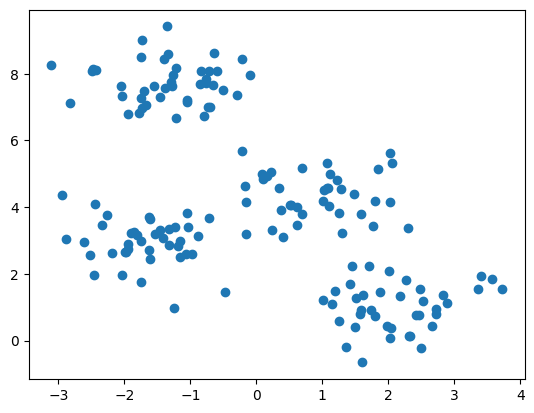

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1])

plt.show()

# Question 7

- Use sklearn kmeans to cluster the ABOVE data with k = the number you chose in the above question
    - Print the clusters centers
    - Scatter plot the data and use the labels **predicted** by the model to color the points --> you should have as many colors in the plot as clusters
    - On the same plot, show the cluster centers

Cluster Centers: [[0.9318262193298693, 4.36866535835694], [-1.6453311374906132, 2.9505799097032943], [-1.33728064133574, 7.717451557963475], [2.120831774850677, 1.0138288262102781]]


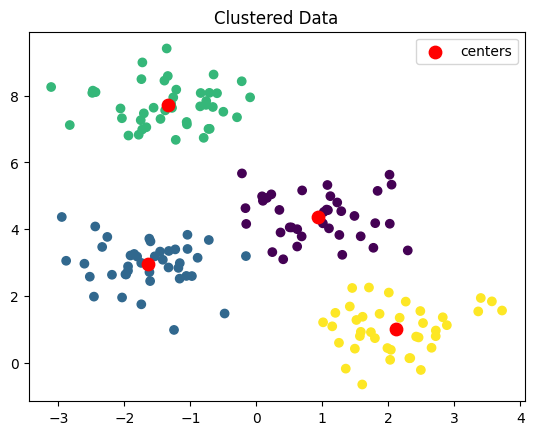

In [ ]:
clf = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42, n_init = 10)
clf.fit(X_train)
centers = clf.cluster_centers_.tolist()
plt.title("Clustered Data")
print("Cluster Centers:",centers)
plt.scatter(X_train[:,0], X_train[:,1], c=clf.labels_.astype(float))
centers_x=[]
centers_y=[]
for i in range(len(centers)):
    centers_x.append(centers[i][0])
    centers_y.append(centers[i][1])

plt.scatter(centers_x,centers_y, c='r',label='centers',marker='o',s=80)
plt.legend()
plt.show()

- Calculate the accuracy score between kmeans prediction and the true blobs labels

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,clf.predict(X_test))
print("Accuracy score is", score)

Accuracy score is 0.325


- Why is the accuracy so low?

ANSWER:
In unsupervised learning, we're grouping data into clusters based on the intrinsic properties of the data itself without reference to external information or true value, and so using the true label as a reference gives low accuracy.

# Question 8


- Write a function that takes the number of clusters, the true labels, and the model predictions
- The function should return a list **new labels** with length = number of clusters
- The function should modify the predicted label of each cluster to be the **mode** (most common **true** label) among the data points in the cluster
- Pseudocode:
    - For each predicted cluster:
        - Calculate mode of true labels of all points within the cluster
        - The mode is the **new label** for this cluster


In [ ]:
from collections import Counter
def relabel(n_clusters, true_labels, pred_labels):
      # Initialize a list to store the new labels for each cluster
    new_labels = [None] * n_clusters

    # Loop over each cluster
    for i in range(n_clusters):
        cluster_indices = [j for j in range(len(pred_labels)) if pred_labels[j] == i]
        cluster_true_labels = [true_labels[j] for j in cluster_indices]
        label_counts = Counter(cluster_true_labels)

        # Find the mode in the current cluster
        mode_label = label_counts.most_common(1)[0][0]
        new_labels[i] = mode_label


    return new_labels

In [ ]:
new_labels = relabel(4, y, clf.predict(X))
assert len(new_labels) == 4
new_labels

[0, 2, 3, 1]

- Calculate the accuracy score of new labels for **ALL** data after relabeling data

In [ ]:
y_pred = clf.predict(X)
for i in range(len(y_pred)):
  if(y_pred[i]==1):
    y_pred[i]=2
  elif(y[i]==2):
    y_pred[i]=3
  elif(y[i]==3):
    y_pred[i]=1
  else:
    y_pred[i]=0
score = accuracy_score(y,y_pred)
print("Accuracy score is", score)

Accuracy score is 0.5


# Question 9
Write your own K-medoids clustering, where the Euclidian distance is used to evaluate the distance/ similarity between the dataset. The input to this function should be:
- The number of clusters
- The dataset

The output should be:
- The list of cluster centers

In [ ]:
from scipy.spatial.distance import cdist
def kmedoids(k, data):
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    while True:
        distances = cdist(data, centroids, metric='euclidean')
        labels = np.argmin(distances, axis=1)
        inertia = np.sum(distances[np.arange(len(data)), labels])

        for i in range(k):
            mask = labels == i
            cluster_data = data[mask]
            if len(cluster_data) == 0:
                continue
            centroid_indices = np.arange(len(data))[mask]
            pairwise_distances = cdist(cluster_data, cluster_data, metric='euclidean')
            medoid_index = centroid_indices[np.argmin(pairwise_distances.sum(axis=0))]
            centroids[i] = data[medoid_index]

        # check if algorithm has converged
        new_distances = cdist(data, centroids, metric='euclidean')
        new_labels = np.argmin(new_distances, axis=1)
        if np.array_equal(labels, new_labels):
            break
    return centroids.tolist(), labels



- Apply YOUR k-medoids clustering algorithm with 4 clusters
- Scatter Plot the points clusters along with the cluster center (use symbols to distinguish the cluster center from cluster point and the color codes to distinguish between the 4 clusters).

- Use the data in the following link: https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat

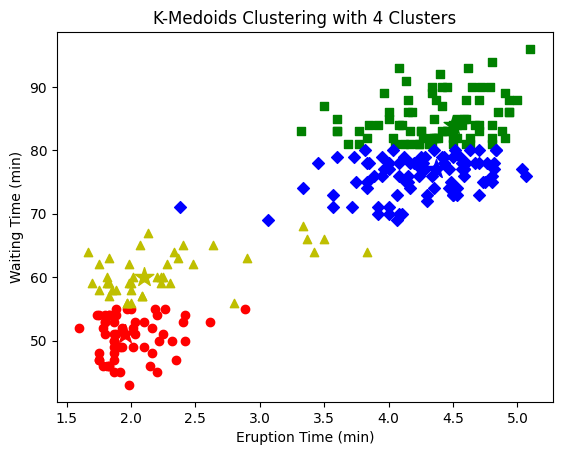

In [ ]:
import pandas as pd
df = pd.read_csv('/content/faithful.csv')
df = df.iloc[:,1:]
dataset = df.to_numpy()
k = 4
centroids, labels = kmedoids(k, dataset)
colors = ['r', 'g', 'b', 'y']
markers = ['o', 's', 'D', '^']
for i in range(k):
    mask = labels == i
    cluster_data = dataset[mask]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[i], marker=markers[i])
    plt.scatter(centroids[i][0], centroids[i][1], color=colors[i], marker='*', s=200)
plt.title("K-Medoids Clustering with {} Clusters".format(k))
plt.xlabel("Eruption Time (min)")
plt.ylabel("Waiting Time (min)")
plt.show()